In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import glob
from datetime import datetime as dt
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 999) 

In [4]:
files = glob.glob('SF/*.gz')

In [5]:
files

['SF/SF_05_04_2015_listings.gz',
 'SF/SF_12_03_2016_listings.gz',
 'SF/SF_06_02_2016_listings.gz',
 'SF/SF_08_02_2017_listings.gz',
 'SF/SF_11_02_2016_listings.gz',
 'SF/SF_09_02_2015_listings.gz',
 'SF/SF_02_02_2016_listings.gz',
 'SF/SF_04_03_2016_listings.gz',
 'SF/SF_08_02_2016_listings.gz',
 'SF/SF_03_02_2017_listings.gz',
 'SF/SF_05_02_2017_listings.gz',
 'SF/SF_11_01_2017_listings.gz',
 'SF/SF_02_02_2017_listings.gz',
 'SF/SF_09_02_2017_listings.gz',
 'SF/SF_09_02_2016_listings.gz',
 'SF/SF_12_02_2017_listings.gz',
 'SF/SF_11_08_2017_listings.gz',
 'SF/SF_10_02_2017_listings.gz',
 'SF/SF_12_02_2015_listings.gz',
 'SF/SF_01_01_2017_listings.gz',
 'SF/SF_05_02_2016_listings.gz',
 'SF/SF_07_02_2017_listings.gz',
 'SF/SF_04_02_2017_listings.gz',
 'SF/SF_12_07_2017_listings.gz',
 'SF/SF_06_02_2017_listings.gz']

In [10]:
df_sf = pd.concat([pd.read_csv(fp, parse_dates = ['calendar_last_scraped','last_scraped', 'first_review', 'last_review']) for fp in files], ignore_index=True)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [11]:
df_sf = df_sf[(df_sf['reviews_per_month'].notnull()) | ((df_sf['number_of_reviews']== 0) & (df_sf['reviews_per_month'].isnull()))]

In [12]:
df_sf.reviews_per_month.fillna(value=0, inplace=True)

In [13]:
df_sf.loc[df_sf.host_about.notnull(), 'host_about_filled'] = True
df_sf.loc[df_sf.host_about.isnull(), 'host_about_filled'] = False

In [14]:
df_sf.loc[df_sf.host_picture_url.notnull(), 'host_picture_url_filled'] = True
df_sf.loc[df_sf.host_picture_url.isnull(), 'host_picture_url_filled'] = False

In [15]:
df_sf['year'] = df_sf.calendar_last_scraped.apply(lambda x: x.year)
df_sf_2017 = df_sf[df_sf['year']==2017]
df_sf_2016 = df_sf[df_sf['year']==2016]
df_sf_2015 = df_sf[df_sf['year']==2015]

In [23]:
df_sf_2017 = df_sf_2017.sort_values(by=['calendar_last_scraped'])

In [27]:
len(df_sf_2017)

117421

In [32]:
df_sf_2017.drop_duplicates(subset=['host_id','id'], keep = 'last', inplace=True)

In [33]:
len(df_sf_2017)

14160

f    8580
t    1413
Name: is_business_travel_ready, dtype: int64

In [34]:
top_twenty_2017 = len(df_sf_2017)*.2
top_twenty_2017

2832.0

In [39]:
top_twenty_2016 = len(df_sf_2016)*.2
top_twenty_2016

13607.0

In [36]:
top_twenty_2015 = len(df_sf_2015)*.2
top_twenty_2015

3790.2000000000003

In [37]:
df_sf_2017.sort_values(by='reviews_per_month', ascending=False).iloc[2832,:]

access                                                                            NaN
accommodates                                                                        1
amenities                           {TV,"Wireless Internet",Kitchen,Heating,"Smoke...
availability_30                                                                     0
availability_365                                                                    8
availability_60                                                                     0
availability_90                                                                     8
bathrooms                                                                           1
bed_type                                                                     Real Bed
bedrooms                                                                            1
beds                                                                                1
calculated_host_listings_count                        

In [40]:
df_sf_2016.sort_values(by='reviews_per_month', ascending=False).iloc[13607,:]

access                                                                            NaN
accommodates                                                                        2
amenities                           {TV,"Cable TV",Internet,"Wireless Internet","W...
availability_30                                                                     9
availability_365                                                                  343
availability_60                                                                    38
availability_90                                                                    68
bathrooms                                                                           1
bed_type                                                                     Real Bed
bedrooms                                                                            1
beds                                                                                1
calculated_host_listings_count                        

In [49]:
df_sf_2015.sort_values(by='reviews_per_month', ascending=False).iloc[3790,:]

access                                                                            NaN
accommodates                                                                        2
amenities                                                                         NaN
availability_30                                                                    10
availability_365                                                                  290
availability_60                                                                    22
availability_90                                                                    33
bathrooms                                                                           1
bed_type                                                                     Real Bed
bedrooms                                                                            1
beds                                                                                1
calculated_host_listings_count                        

In [38]:
df_sf_2017.loc[df_sf_2017.reviews_per_month >= 2.43, 'popular'] = True
df_sf_2017.loc[df_sf_2017.reviews_per_month < 2.43, 'popular'] = False

In [22]:
df_sf_2016.loc[df_sf_2016.reviews_per_month >= 2.36, 'popular'] = True
df_sf_2016.loc[df_sf_2016.reviews_per_month < 2.36, 'popular'] = False

In [23]:
df_sf_2015.loc[df_sf_2015.reviews_per_month >= 2.5, 'popular'] = True
df_sf_2015.loc[df_sf_2015.reviews_per_month < 2.5, 'popular'] = False

In [24]:
df_sf.cancellation_policy.fillna(value='none', inplace=True)

In [25]:
df_sf.cleaning_fee.fillna(value='$0.00', inplace=True)

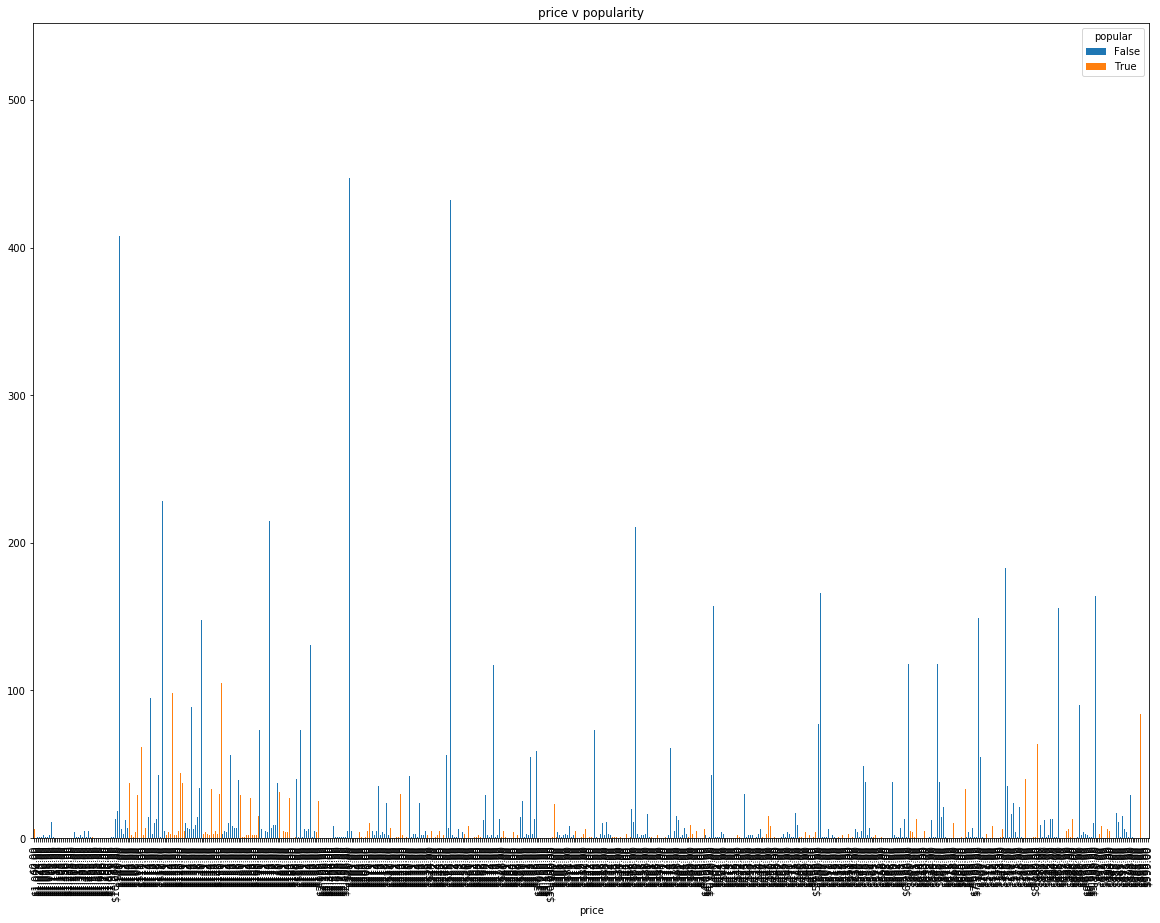

In [41]:
pd.crosstab(df_sf_2017.price, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'price v popularity');

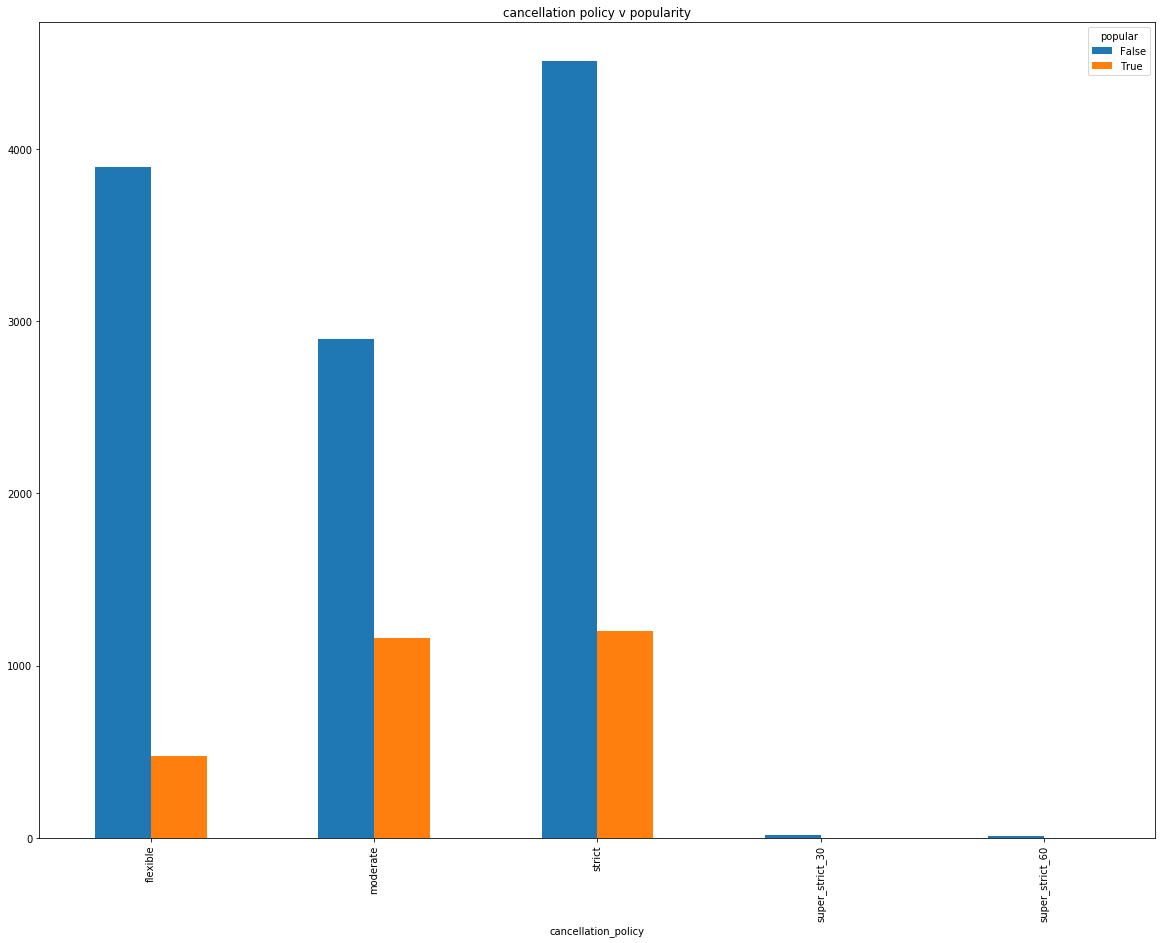

In [42]:
pd.crosstab(df_sf_2017.cancellation_policy, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'cancellation policy v popularity');

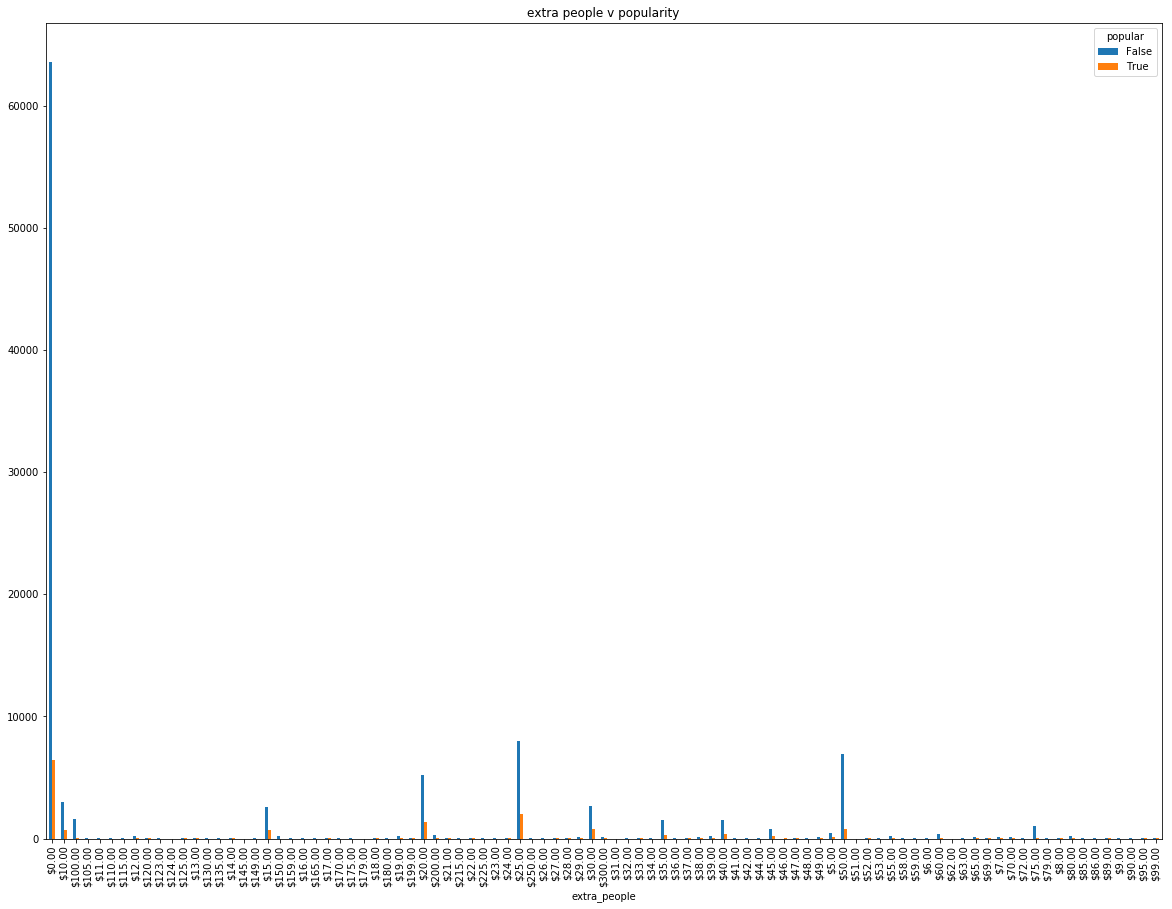

In [31]:
pd.crosstab(df_sf_2017.extra_people, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'extra people v popularity');

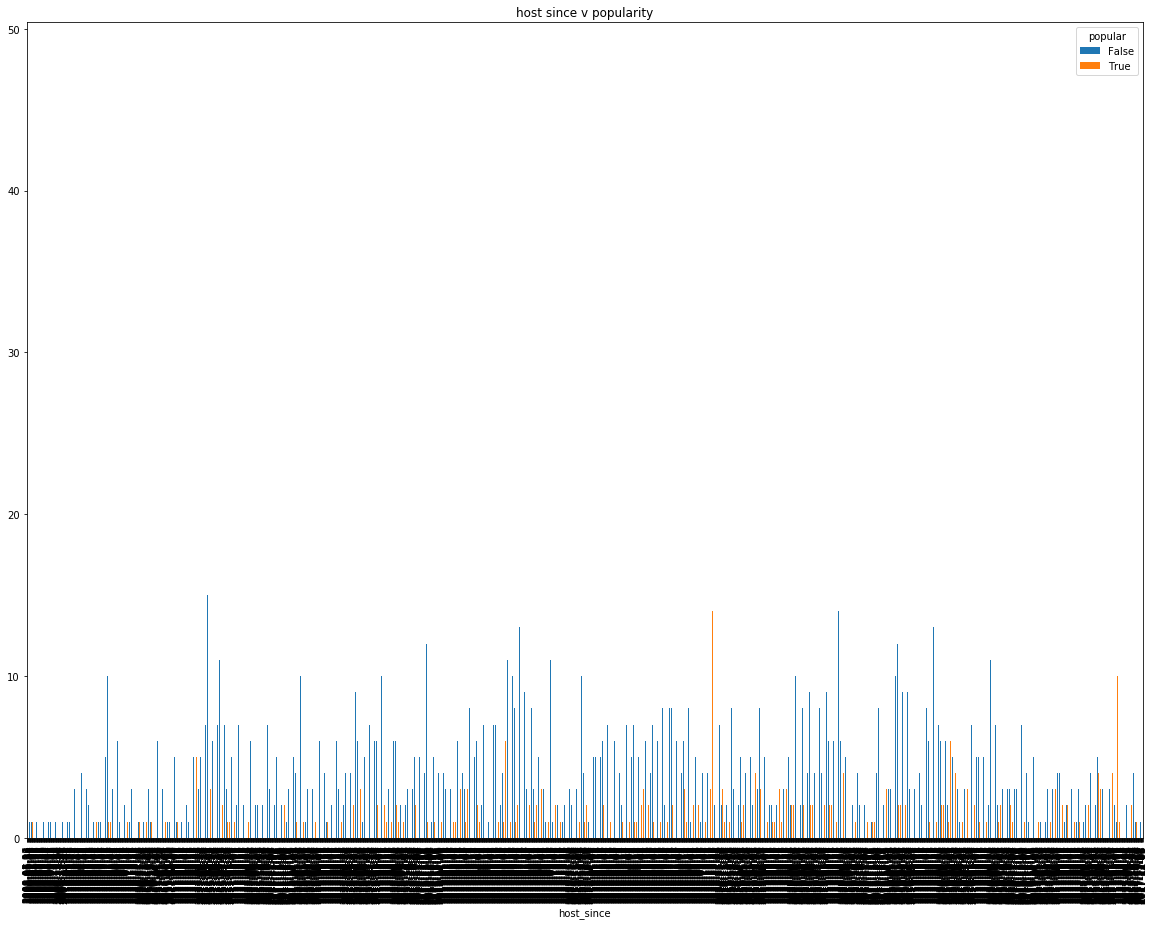

In [43]:
pd.crosstab(df_sf_2017.host_since, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'host since v popularity');

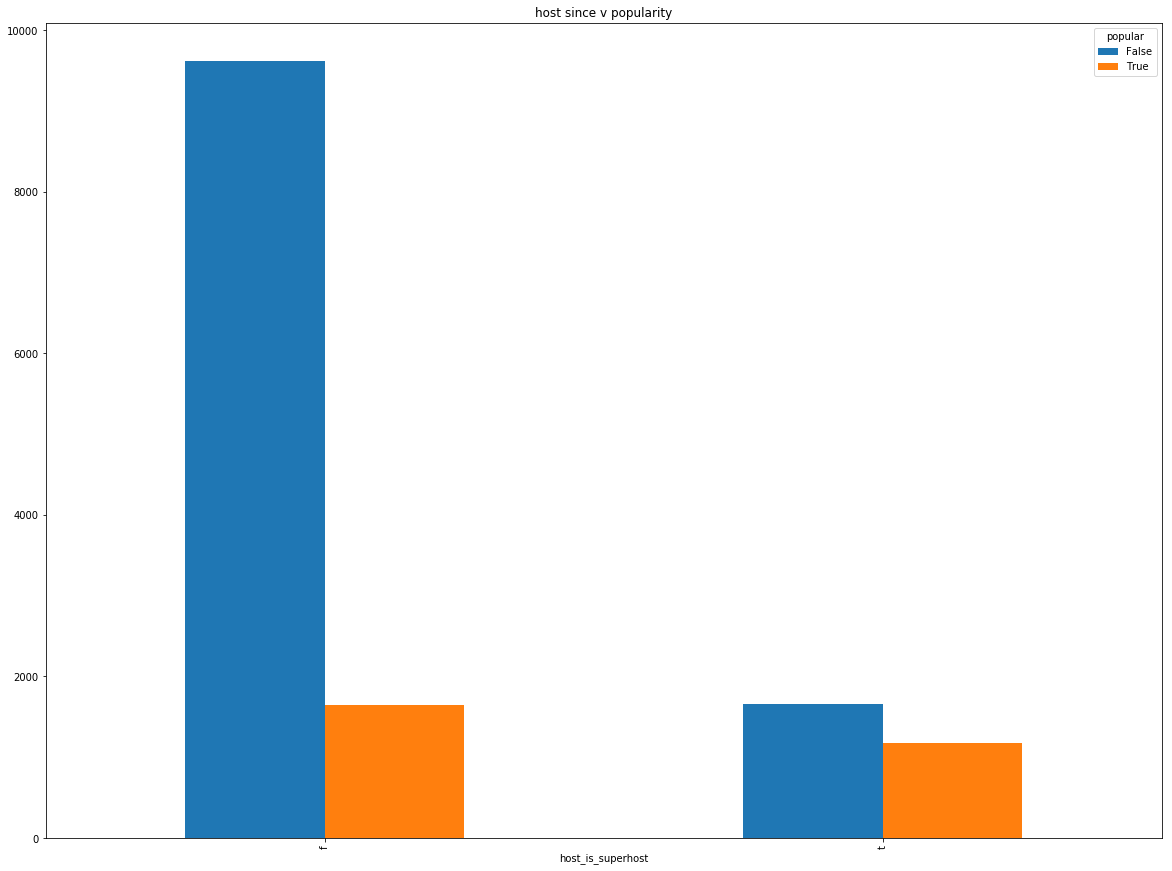

In [44]:
pd.crosstab(df_sf_2017.host_is_superhost, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'host since v popularity');

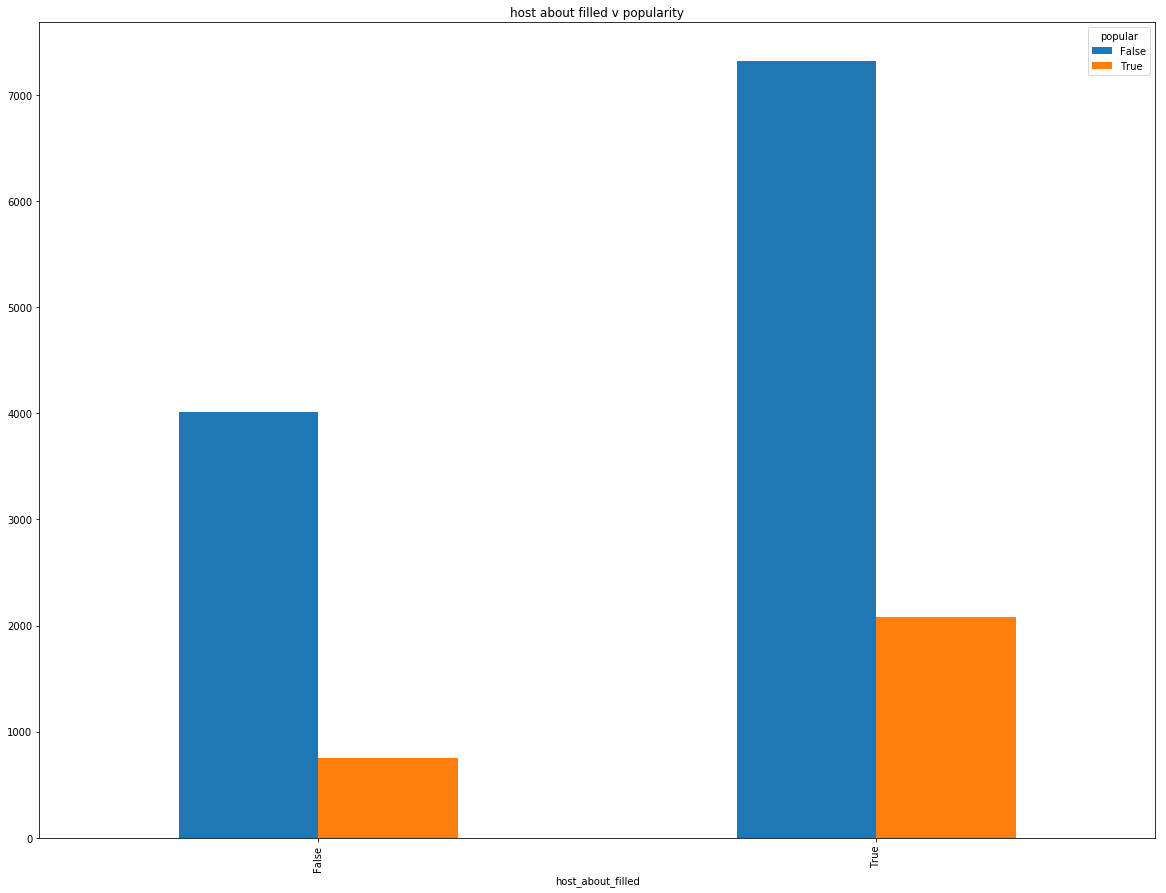

In [45]:
pd.crosstab(df_sf_2017.host_about_filled, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'host about filled v popularity');

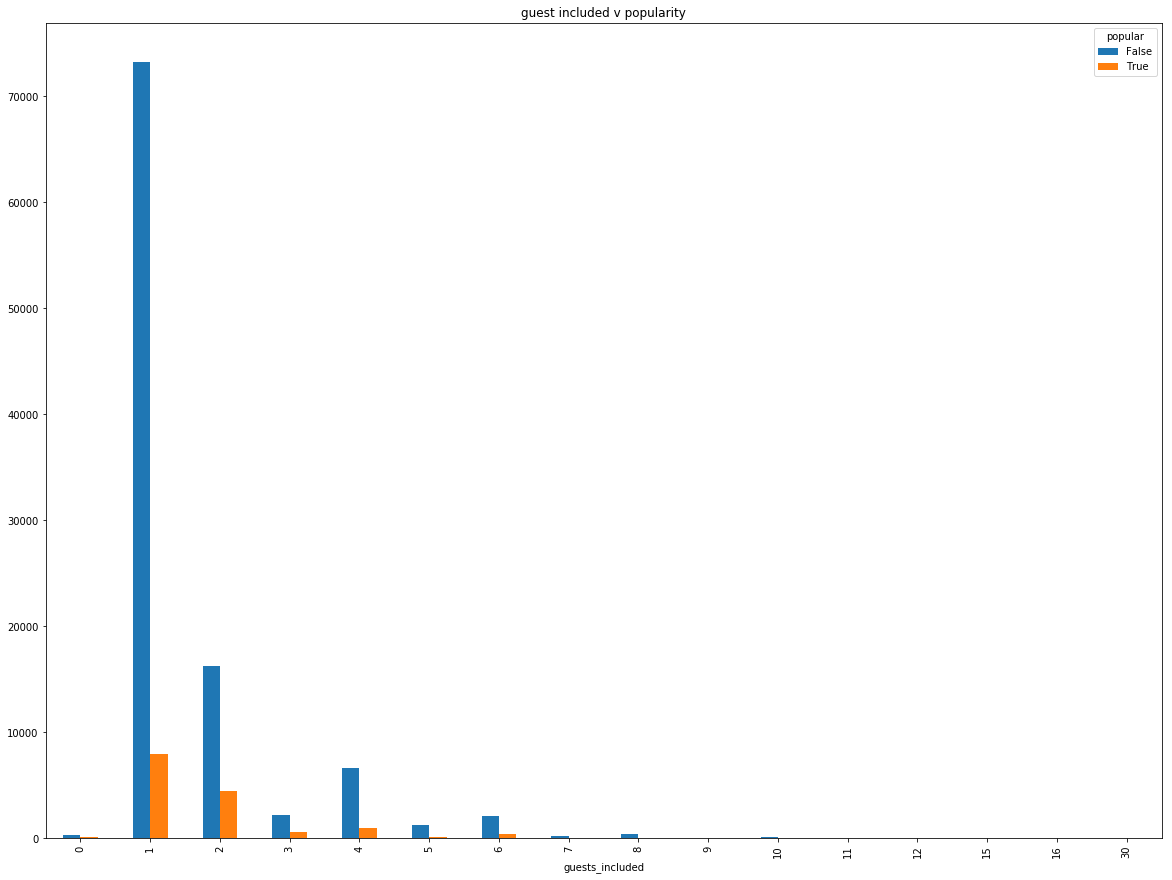

In [34]:
pd.crosstab(df_sf_2017.guests_included, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'guest included v popularity');

In [46]:
df_sf_2017.amenities.value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                143
{"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                                                                                                                                                                                       

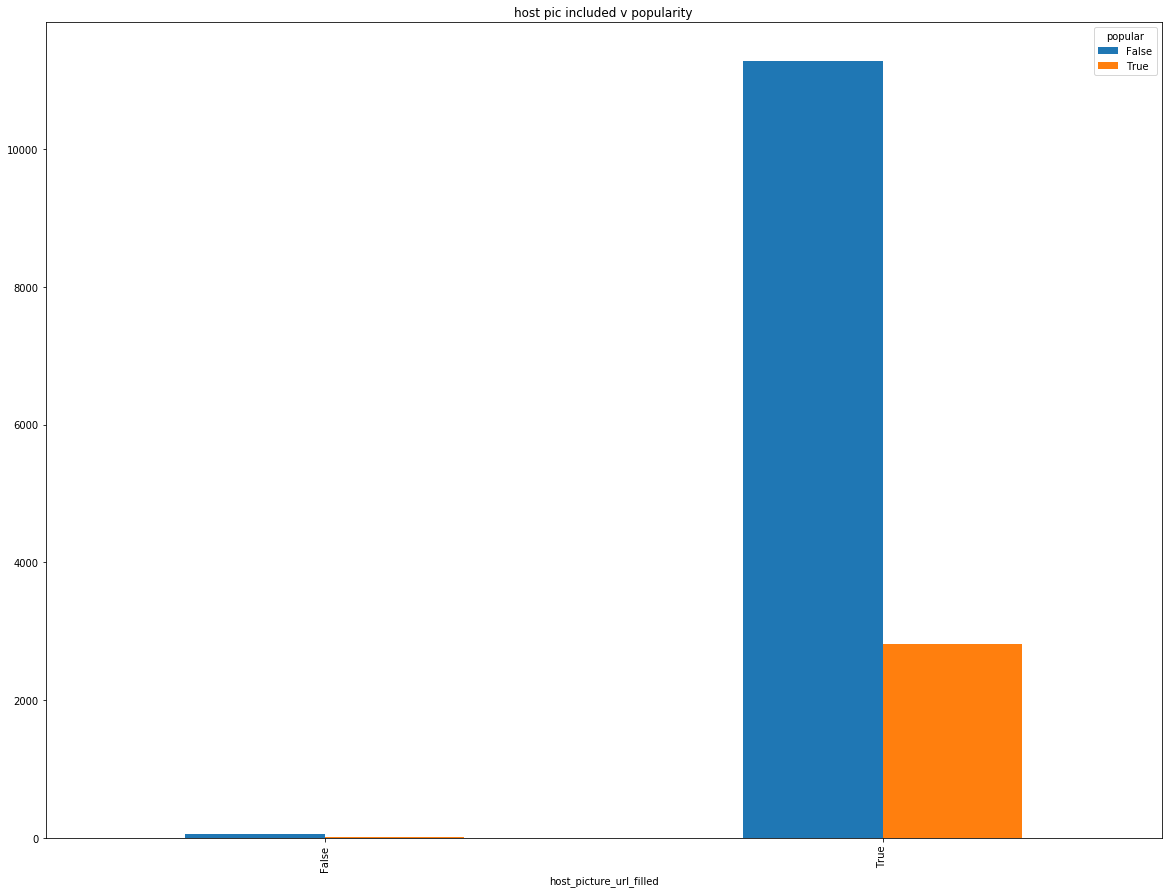

In [47]:
pd.crosstab(df_sf_2017.host_picture_url_filled, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'host pic included v popularity');

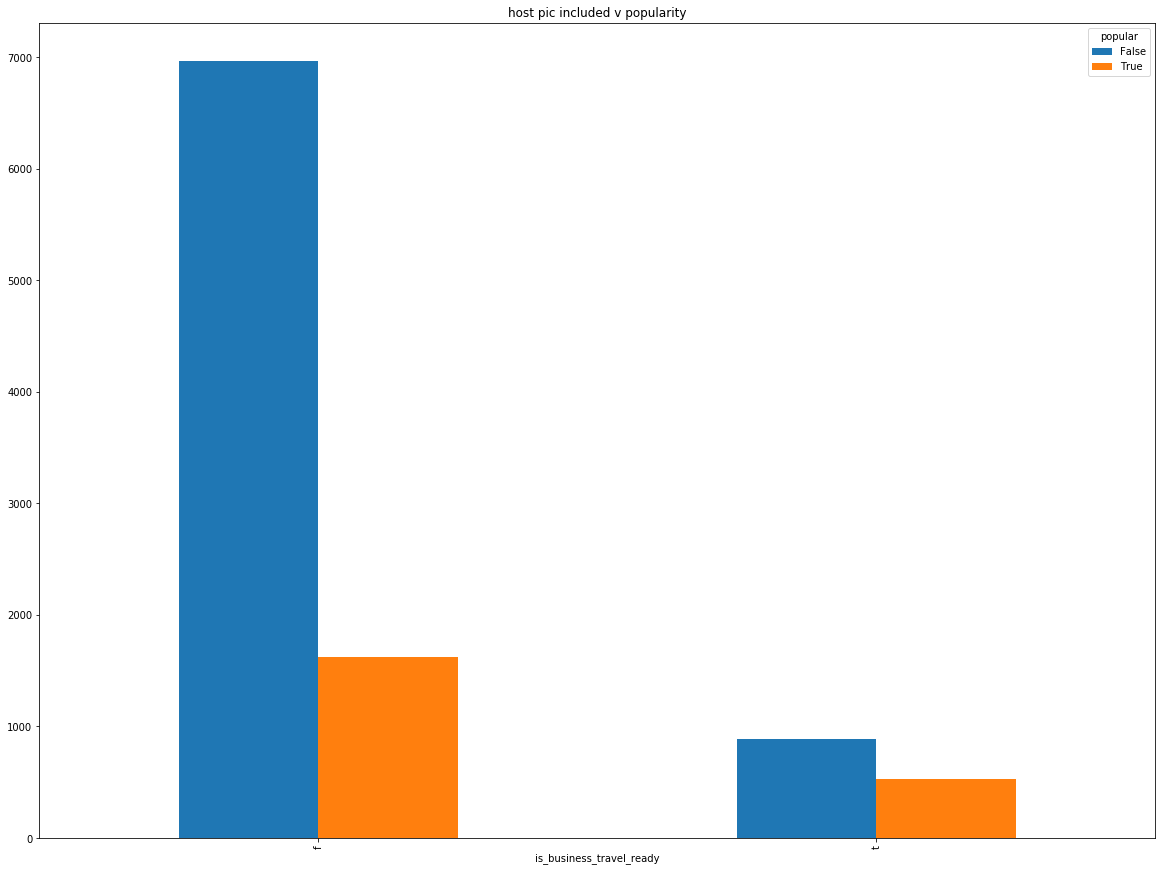

In [49]:
pd.crosstab(df_sf_2017.is_business_travel_ready, df_sf_2017.popular).plot(kind = 'bar', figsize = (20, 15), title = 'host pic included v popularity');

In [52]:
len(df_sf_2017.monthly_price.value_counts())/len(df_sf_2017)

0.03283898305084746

In [53]:
df_sf_2017[['price', 'weekly_price', 'monthly_price']]

,price,weekly_price,monthly_price
160461,$140.00,$950.00,NaN
160452,$155.00,NaN,NaN
160438,$200.00,"$1,330.00","$4,500.00"
160440,"$1,200.00",NaN,NaN
160441,$110.00,$700.00,NaN
160496,$240.00,NaN,NaN
160492,$118.00,NaN,NaN
160465,$300.00,$695.00,NaN
160476,$97.00,$529.00,NaN
160390,$160.00,"$1,100.00",NaN
